<a href="https://colab.research.google.com/github/EllouziMedAmin/DSWithPytorch/blob/main/sentiment_with_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [4]:
from sentence_transformers import SentenceTransformer

In [5]:
#import data
twitter_file = 'Tweets.csv'
df = pd.read_csv(twitter_file)

In [6]:
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [8]:
df.isna().mean()

,0
textID,0.000000
text,0.000036
selected_text,0.000036
sentiment,0.000000


In [10]:
df=df.dropna()

In [11]:
#Create Target Variable
cat_id = {'neutral': 1,
          'negative': 0,
          'positive': 2}


In [ ]:
df['class'] = df['sentiment'].map(cat_id)

In [13]:
df.head()

,textID,text,selected_text,sentiment,class
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,1
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,0
2,088c60f138,my boss is bullying me...,bullying me,negative,0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,0


In [14]:
#Hyperparameters
BATCH_SIZE = 128
NUM_EPOCHS = 80
MAX_FEATURES = 10

In [15]:
#Embedding Model
emb_model = SentenceTransformer('sentence-transformers/all-mpnet-base-v1')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/9.75k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/591 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [16]:
sentences = [ "Each sentence is converted"]
embeddings = emb_model.encode(sentences)
embeddings

array([[ 4.00136933e-02,  8.55442137e-03, -1.88630540e-02,
         6.02709316e-02,  5.72782457e-02,  2.99501289e-02,
         1.63761787e-02,  2.14604381e-02, -7.47055188e-02,
        -4.09458391e-02, -2.51449216e-02,  6.38353899e-02,
         3.50898062e-03, -7.41743017e-03, -3.71665023e-02,
        -7.38465041e-02,  6.45619333e-02, -1.91149171e-02,
        -5.34372739e-02,  3.57453823e-02,  5.72719378e-03,
         5.18304519e-02, -1.57416426e-02, -2.32236218e-02,
         2.33237799e-02,  3.31329298e-03,  2.31329221e-02,
        -8.86394293e-04, -1.22447386e-02, -1.66127309e-02,
        -6.83541745e-02, -2.93661878e-02, -2.73816120e-02,
         1.51105458e-02,  7.84572185e-10,  4.13987273e-03,
        -3.79157551e-02, -5.54059781e-02, -1.82934757e-02,
         5.50112128e-02,  2.24507004e-02, -1.36461342e-02,
         6.55123685e-03,  1.13984197e-02, -5.76265082e-02,
         9.54150222e-03,  3.10417153e-02, -1.10082952e-02,
         4.96229976e-02,  8.32017213e-02, -3.30031514e-0

In [17]:
print(embeddings.squeeze().shape)

(768,)


In [18]:
#prepare X and y
X = emb_model.encode(df['text'].values)

In [20]:
X.shape

(27480, 768)

In [21]:
X

array([[-0.00012348, -0.03670081, -0.00711451, ...,  0.03602669,
         0.00672687, -0.00080653],
       [-0.06087939,  0.08179912, -0.02384331, ...,  0.05476362,
         0.00708243,  0.00902244],
       [ 0.03142996,  0.02667523,  0.00553763, ...,  0.0271139 ,
        -0.04929622, -0.02347036],
       ...,
       [-0.04614255, -0.02598281, -0.04567857, ...,  0.02924888,
        -0.01008496,  0.0505103 ],
       [-0.01235297,  0.04911929, -0.04218992, ...,  0.01497066,
         0.02058608,  0.02223175],
       [-0.03026163, -0.05488072, -0.03151754, ...,  0.08850192,
        -0.03230176, -0.02819373]], dtype=float32)

In [19]:
y = df['class'].values

In [22]:
y.shape

(27480,)

In [23]:
#Train Val Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)


In [24]:
class SentimentData(Dataset):
    def __init__(self, X, y):
        super().__init__()
        self.X = torch.Tensor(X)
        self.y = torch.Tensor(y).type(torch.LongTensor)
        self.len = len(self.X)

    def __len__(self):
        return self.len

    def __getitem__(self, index):
        return self.X[index], self.y[index]


train_ds = SentimentData(X= X_train, y = y_train)
test_ds = SentimentData(X_test, y_test)


In [25]:
# Dataloader
train_loader = DataLoader(dataset=train_ds, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=15000)

In [26]:
class SentimentModel(nn.Module):
    def __init__(self, NUM_FEATURES, NUM_CLASSES, HIDDEN = 10):
        super().__init__()
        self.linear = nn.Linear(NUM_FEATURES, HIDDEN)
        self.linear2 = nn.Linear(HIDDEN, NUM_CLASSES)
        self.relu = nn.ReLU()
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.linear(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.log_softmax(x)
        return x


In [27]:
# Model, Loss and Optimizer
model = SentimentModel(NUM_FEATURES = X_train.shape[1], NUM_CLASSES = 3)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters())

In [28]:
# Model Training
train_losses = []
for e in range(NUM_EPOCHS):
    curr_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred_log = model(X_batch)
        loss = criterion(y_pred_log, y_batch.long())

        curr_loss += loss.item()
        loss.backward()
        optimizer.step()
    train_losses.append(curr_loss)
    print(f"Epoch {e}, Loss: {curr_loss}")

Epoch 0, Loss: 110.22343516349792
Epoch 1, Loss: 90.34044522047043
Epoch 2, Loss: 81.46991580724716
Epoch 3, Loss: 77.9690854549408
Epoch 4, Loss: 76.2478256225586
Epoch 5, Loss: 74.98445200920105
Epoch 6, Loss: 74.09654414653778
Epoch 7, Loss: 73.30686837434769
Epoch 8, Loss: 72.80446487665176
Epoch 9, Loss: 72.19287174940109
Epoch 10, Loss: 71.74178144335747
Epoch 11, Loss: 71.45962435007095
Epoch 12, Loss: 71.0036912560463
Epoch 13, Loss: 70.59166467189789
Epoch 14, Loss: 70.16339910030365
Epoch 15, Loss: 69.81609904766083
Epoch 16, Loss: 69.58941599726677
Epoch 17, Loss: 69.29802024364471
Epoch 18, Loss: 69.22070479393005
Epoch 19, Loss: 68.80860310792923
Epoch 20, Loss: 68.40604400634766
Epoch 21, Loss: 68.19238203763962
Epoch 22, Loss: 68.04192835092545
Epoch 23, Loss: 67.62484765052795
Epoch 24, Loss: 67.38552865386009
Epoch 25, Loss: 67.29470431804657
Epoch 26, Loss: 67.20212581753731
Epoch 27, Loss: 66.91043543815613
Epoch 28, Loss: 66.64227801561356
Epoch 29, Loss: 66.3838389

<Axes: >

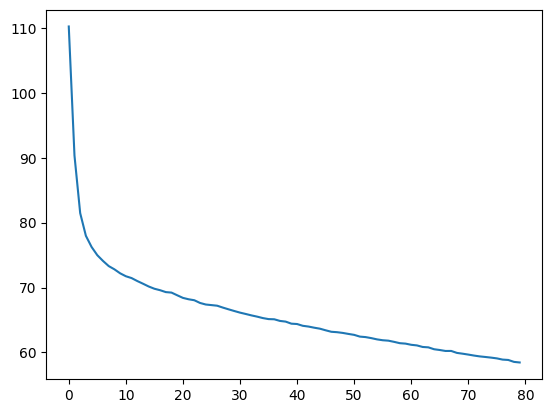

In [29]:
sns.lineplot(x=list(range(len(train_losses))), y= train_losses)

In [30]:
# Model Evaluation
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        y_test_pred_log = model(X_batch)
        y_test_pred = torch.argmax(y_test_pred_log, dim = 1)

In [31]:
y_test_pred_np = y_test_pred.squeeze().cpu().numpy()

In [32]:
acc = accuracy_score(y_pred=y_test_pred_np, y_true = y_test)
f"The accuracy of the model is {np.round(acc, 3)*100}%."

'The accuracy of the model is 67.9%.'

In [33]:
most_common_cnt = Counter(y_test).most_common()[0][1]
print(f"Naive Classifier: {np.round(most_common_cnt / len(y_test) * 100, 1)} %")

Naive Classifier: 41.0 %


<Axes: >

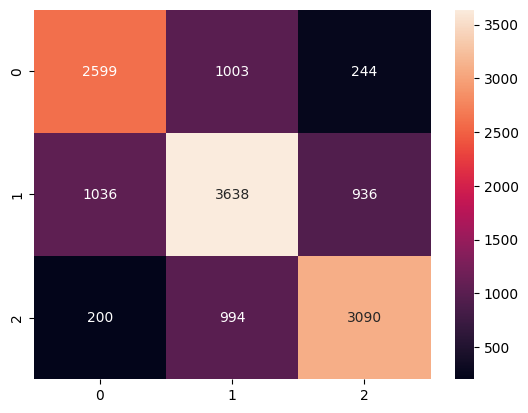

In [34]:
#  Confusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test_pred_np, y_test), annot=True, fmt=".0f")
